# PRÁCTICA 1
# ESTIMACIÓN DE LA AUTOCORRELACIÓN

En muchas aplicaciones es necesario obtener la autocorrelación de un proceso aleatorio a partir de un
número finito de muestras de señal $x(n)$ ($n = 0,1, \dots, N-1$). Un estimador muy común es el siguiente:

\begin{equation}
\hat{r}_x(k) = \frac{1}{N} \sum_{n=|k|}^{N-1} x(n) x^*(n - |k|) 
\end{equation}


donde se está suponiendo implícitamente que $x(n) = 0$ fuera del intervalo considerado. Esto es equivalente
a considerar que se ha aplicado una ventana $w(n)$ rectangular a la señal $x_{\text{org}}(n)$ que originalmente se
extendía desde $n = -\infty$ hasta $n = \infty$, de modo que $x(n) = x_{\text{org}}(n) w(n)$.

Alternativamente, la expresión (1) puede entenderse como una convolución:

\begin{equation}
\hat{r}_x(k) = \frac{1}{N} x(k) * x^*(-k) \tag{2}
\end{equation}



### NOTA para implementación en Python:
Todas las comparaciones se efectuarán haciendo uso de las utilidades gráficas de `matplotlib.pyplot`.

### Módulos para la implementación en Python:
```python
import numpy as np
import matplotlib.pyplot as plt
```

___


# EJERCICIO 1
**(Cuestión teórica)**  
Determinar si la estimación (1) propuesta para la autocorrelación tiene o no sesgo.

La estimación dada por  
$$\hat{r}_x(k) = \frac{1}{N} \sum_{n=|k|}^{N-1} x(n) x^*(n - |k|)$$  
se considera un **estimador sesgado** de la autocorrelación, ya que el factor de normalización es $\frac{1}{N}$ en lugar de $\frac{1}{N - |k|}$. Para que fuera no sesgado, debería compensarse la reducción en el número de términos efectivos cuando $|k|$ crece.

In [1]:
# (No hay código en este ejercicio, es una cuestión teórica)
pass

___

# EJERCICIO 2
Generar $N = 1000$ muestras de un ruido blanco Gaussiano de media nula y varianza unidad mediante
el comando `np.random.randn(N)`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# EJERCICIO 2

N = 1000  
mu = 3.0
sigma = 1.0
                
x1 = np.random.normal(mu, sigma, N)     # Ruido blanco Gaussiano de media mu y varianza sigma^2         
x2 = np.random.randn(N)                 # Ruido blanco Gaussiano de media 0 y varianza 1
x3 = mu + sigma * np.random.randn(N)    # Ruido blanco Gaussiano de media mu y varianza sigma^2
x4 = np.random.uniform(-1, 1, N)        # Ruido blanco uniforme entre -1 y 1

seleccion = x1          # Seleccionar aquí la variable que se quiere analizar
print("Primeras 10 muestras del ruido generado:")
print(seleccion[:10])   # o seleccion[0:10] para Python 2
print("\nMedia aproximada:", np.mean(seleccion))
print("Varianza aproximada:", np.var(seleccion))

Primeras 10 muestras del ruido generado:
[3.25439607 1.82514731 3.94900859 2.79464708 3.7935041  2.94893633
 3.18840921 4.26122688 3.8220607  0.32290695]

Media aproximada: 2.9747287441101307
Varianza aproximada: 1.0636677296429444


___

# EJERCICIO 3
Estimar la autocorrelación $r_x(k)$ ( $k = -(N - 1), \dots, N - 1$ ) de acuerdo con la expresión (1), y también haciendo uso de los comandos `convolve` (ecuación (2)) y `correlate` de numpy. Explicar los resultados obtenidos comparando gráficamente con la función de autocorrelación verdadera $r_x(k) = \delta(k)$.

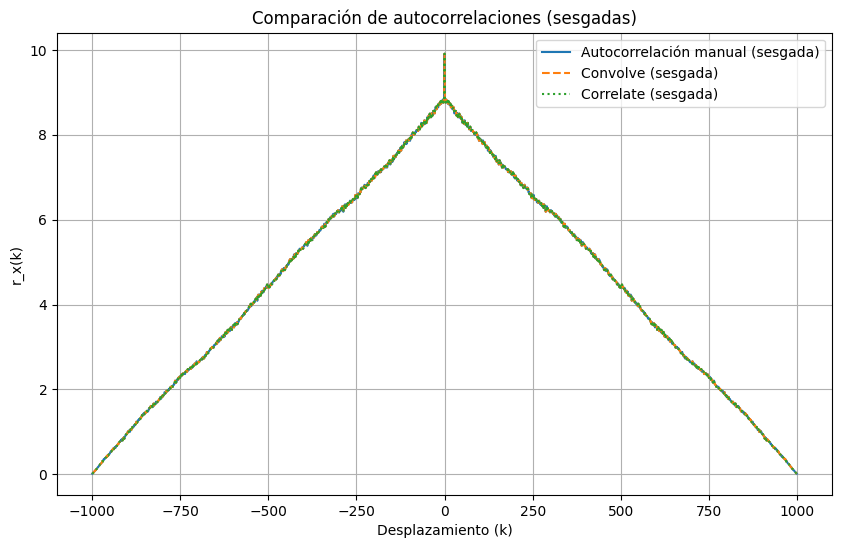

In [3]:
# EJERCICIO 3

def autocorr_biased(x):
    N = len(x)
    r = np.zeros(2*N - 1, dtype=complex)  # k desde -(N-1) hasta (N-1)
    for k in range(-(N-1), N):
        idx = k + (N-1)
        suma = 0
        for n in range(abs(k), N):
            suma += x[n] * np.conjugate(x[n - abs(k)])
        r[idx] = suma / N
    return r

# Seleccionamos x3 como la variable x
x = x1 # Seleccionar aquí la variable que se quiere analizar. Mire el ejercicio 2 para más detalles.

# Estimación manual (sesgada)
r_manual = autocorr_biased(x)

# Usando convolve (ecuación (2))
# r_x(k) = (1/N) * x(k) * x^*(-k) Equivale a convolucionar x(n) con x^*(-n) y dividir por N
r_conv = np.convolve(x, np.conjugate(x[::-1]), mode='full') / N

# Usando correlate de numpy (sesgado)
r_corr = np.correlate(x, x, mode='full') / N # Se divide por N para que sea no sesgada

lags = np.arange(-(N-1), N) # Genera array de enteros desde -(N-1) hasta N-1 (incluyendo -(N-1) y excluyendo N)

plt.figure(figsize=(10, 6))
plt.plot(lags, r_manual.real, label='Autocorrelación manual (sesgada)')
plt.plot(lags, r_conv.real, '--', label='Convolve (sesgada)')
plt.plot(lags, r_corr.real, ':', label='Correlate (sesgada)')
plt.title('Comparación de autocorrelaciones (sesgadas)')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)
plt.show()

Se obtienen resultados distintos para cada vector $xX$ (donde $X \in \{1, 2, 3, 4\}$ son los vectores del ejercicio anterior) ya que la varianza y la media de este varía.

La autocorrelación se puede expresar en términos de una convolución. Se demuestra que:
$$ r_x(k) = \frac{1}{N}\sum_{k=-\infty}^{\infty} x(n)x^*(n-k) =  \frac{1}{N} x(k)*x^*(-k)$$

En la autocorrelación **sesgada** (dividiendo siempre por $N$) y con modo *full*, a medida que aumenta $|k|$, cada retardo suma menos productos (porque hay menos solapamiento entre los índices). Sin embargo, la normalización permanece fija en $N$. Esto provoca que la amplitud de la autocorrelación decrezca linealmente con $|k|$ y se forme esa "pirámide" para $xX$ donde la media no sea nula. Cuando esta media es cero, los valores varían entre negativos y positivos con la misma probabilidad y la acumulación de estos tenderá a la media.   

Para corregir el sesgo, se define la autocorrelación **no sesgada** como:

$$\tilde{r}_x(k) = \frac{N}{N - |k|} \hat{r}_x(k)$$
Podemos escribir esta relación como:

$$\hat{r}_x(k) = \left( 1 - \frac{|k|}{N} \right) \tilde{r}_x(k)$$

donde el término de ponderación $W_B(k)$  se define como:

$$W_B(k) = 1 - \frac{|k|}{N}$$

Este término actúa como un **factor de corrección**, eliminando el sesgo en la estimación.
___

# EJERCICIO 4
Obtener ahora la estima **sin sesgo** de la autocorrelación usando el comando `correlate` (MatLab: `xcorr`) de numpy. Comparar gráficamente esta estima con la obtenida mediante el estimador sesgado de los apartados anteriores.

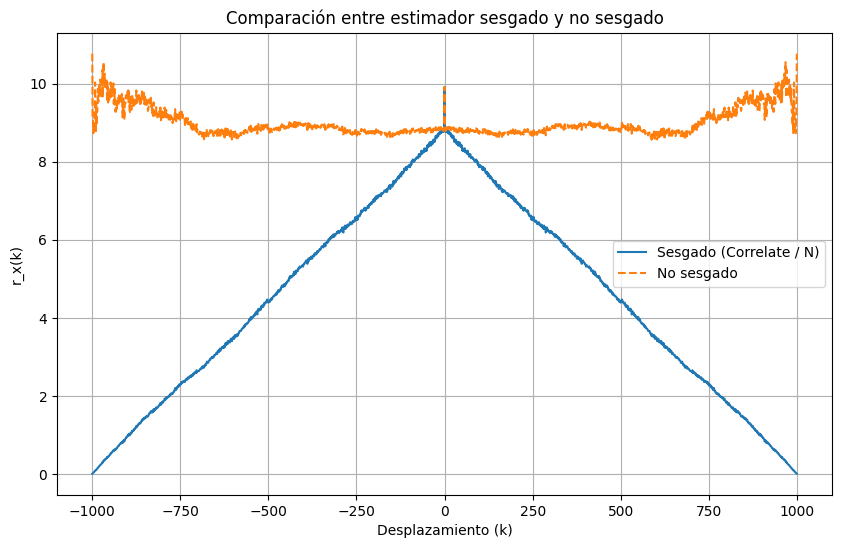

In [4]:
# EJERCICIO 4

def autocorr_unbiased(x):
    N = len(x)
    r = np.correlate(x, x, mode='full') / N # Autocorrelación sesgada
    lags = np.arange(-(N-1), N)
    
    # Normalización sin sesgo
    unbiased_r = np.zeros_like(r, dtype=float)  # Inicializa array de floats
    for i, k in enumerate(lags):
        unbiased_r[i] = r[i] * N/(N - abs(k))   # Transforma a no sesgado
    return unbiased_r, lags

r_unbiased, lags = autocorr_unbiased(x)         # LLama a la función autocorr_unbiased

plt.figure(figsize=(10, 6))
plt.plot(lags, r_corr.real, label='Sesgado (Correlate / N)')
plt.plot(lags, r_unbiased, '--', label='No sesgado')
plt.title('Comparación entre estimador sesgado y no sesgado')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)
plt.show()


La versión **no sesgada** divide cada valor por ($N - |k|$) en vez de N, por lo que corrige la disminución de muestras efectivas para grandes |$k$|. Cuando $k$ aumenta, la estimación es peor ya que se "participan" menos muestras y, por ende, el enfoque sin sesgo atrubuye en estos casos un "peso" menor.

En caso de haber elegido un $x$ con media no nula, véase como la función está "elevada" a $m_{x}\cdot m_{x}$ ya que se trata de un momento no centrado pues se define como
$$ R_x(k) = VAR_x(k) + m_x^2$$
___

# EJERCICIO 5
Obtener las estimaciones de la autocorrelación con sesgo y sin sesgo para el mismo ruido anterior
pero añadiendo una media unitaria. ¿Cómo debería ser la autocorrelación original en este caso?
Explicar los resultados obtenidos.

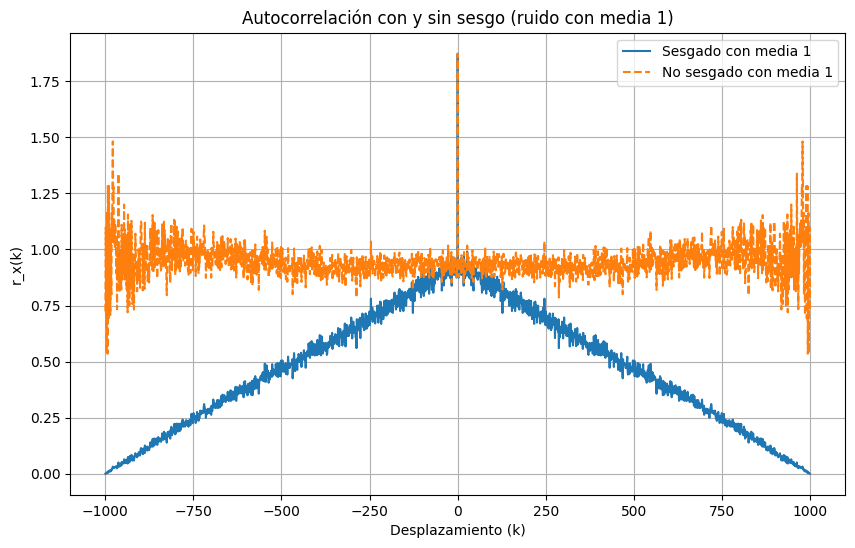

In [5]:
# EJERCICIO 5

# Generamos el mismo ruido pero con media 1
x_mean1 = np.random.randn(N) + 1

# Estimador sesgado
r_corr_mean1 = np.correlate(x_mean1, x_mean1, mode='full') / N

# Estimador no sesgado
r_unbiased_mean1, lags = autocorr_unbiased(x_mean1)

plt.figure(figsize=(10, 6))
plt.plot(lags, r_corr_mean1.real, label='Sesgado con media 1')
plt.plot(lags, r_unbiased_mean1, '--', label='No sesgado con media 1')
plt.title('Autocorrelación con y sin sesgo (ruido con media 1)')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)
plt.show()


El resultado se explica en el anterior ejercicio pero se explicará de nuevo.

Teóricamente, con media 1, la autocorrelación de una señal $x(n) = w(n) + 1$ 
(donde $w(n)$ es ruido blanco de varianza 1) tiene un valor en $k=0$ que 
incluye la varianza y el cuadrado de la media ($1^2 = 1$). Para $k \neq 0$, la autocorrelación debe reflejar la correlación de $w(n)$ 
(que es prácticamente $\delta(k)$) más la contribución de la media. Ya que

```python
x = np.random.normal(mu, sigma, N) = mu + sigma * np.random.randn(N) 
```
Observamos un incremento en todos los valores de $r_x(k)$ debido a la media unitaria.
___

# EJERCICIO 6
Aplicar los estimadores de media y varianza muestral sobre 100 estimas de la autocorrelación, cada
una de ellas obtenida a partir de una secuencia distinta de ruido blanco de media unidad. ¿Qué
sucede si aumentas el número de estimas a 1000, 10000, etc? ¿A qué tiende la media? ¿Qué indica
la varianza? Comparar los resultados al usar los estimadores sesgado y no sesgado.

num_estimates = 10
Media (sesgado)   = 1.9935, Var (sesgado)   = 4.2244e-03
Media (no sesgado)= 1.9935, Var (no sesgado)= 4.2244e-03



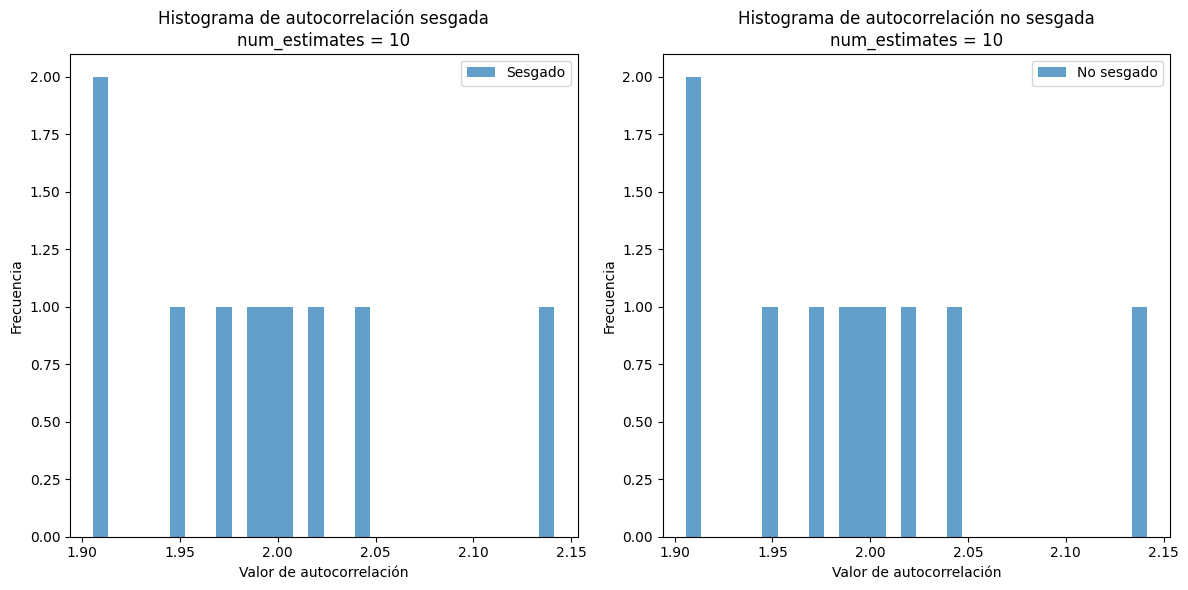

num_estimates = 100
Media (sesgado)   = 2.0091, Var (sesgado)   = 7.2144e-03
Media (no sesgado)= 2.0091, Var (no sesgado)= 7.2144e-03



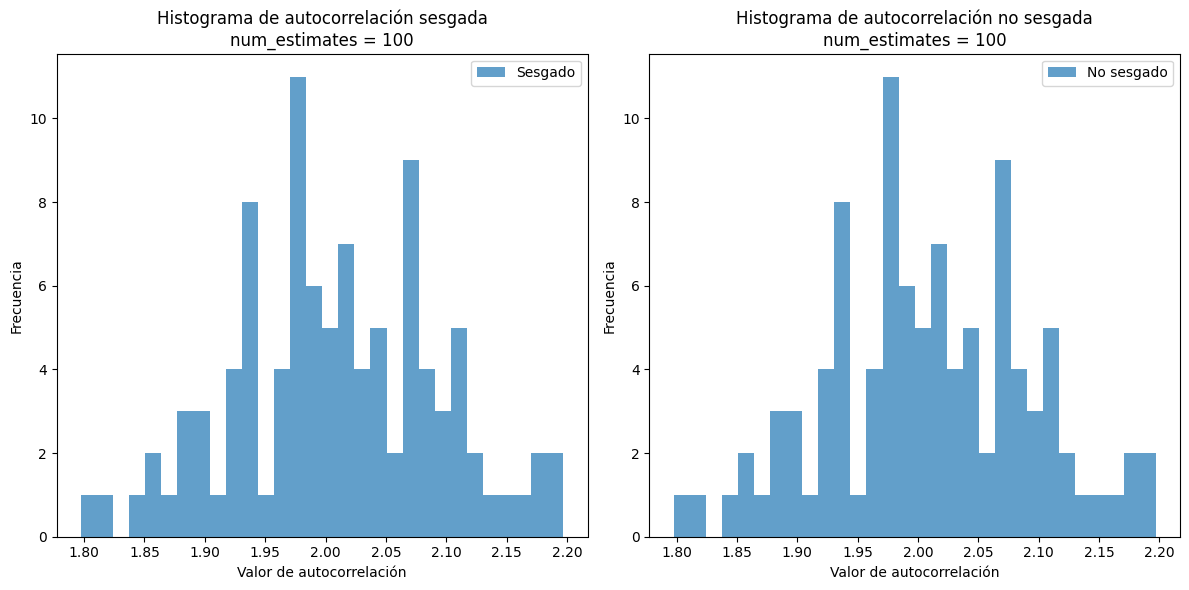

num_estimates = 1000
Media (sesgado)   = 2.0045, Var (sesgado)   = 6.0978e-03
Media (no sesgado)= 2.0045, Var (no sesgado)= 6.0978e-03



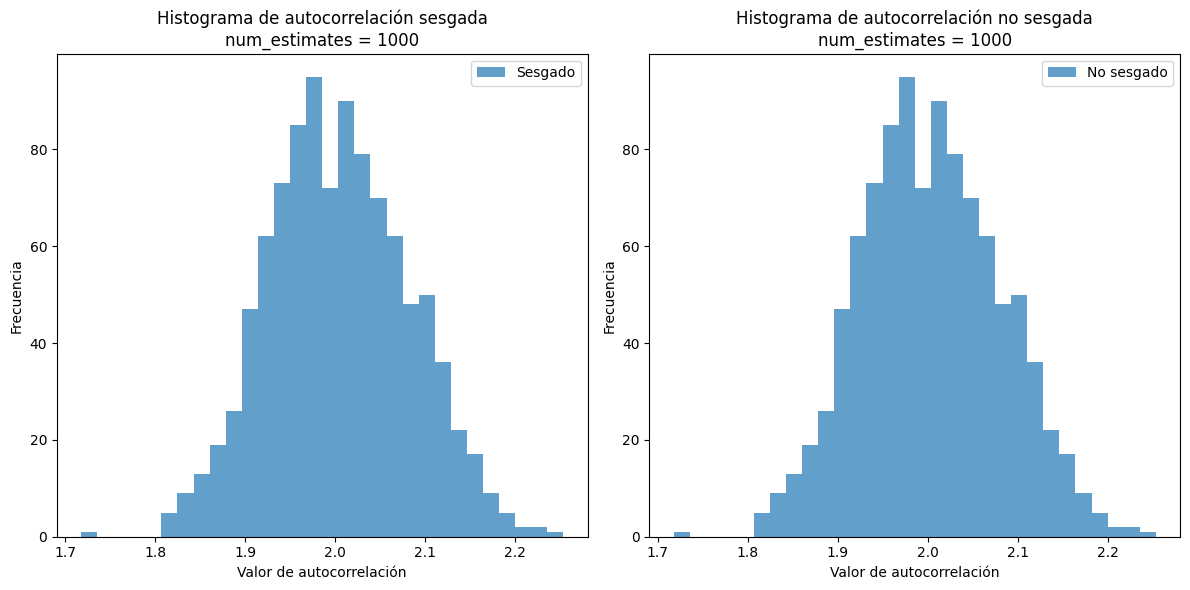

num_estimates = 10000
Media (sesgado)   = 2.0006, Var (sesgado)   = 5.9823e-03
Media (no sesgado)= 2.0006, Var (no sesgado)= 5.9823e-03



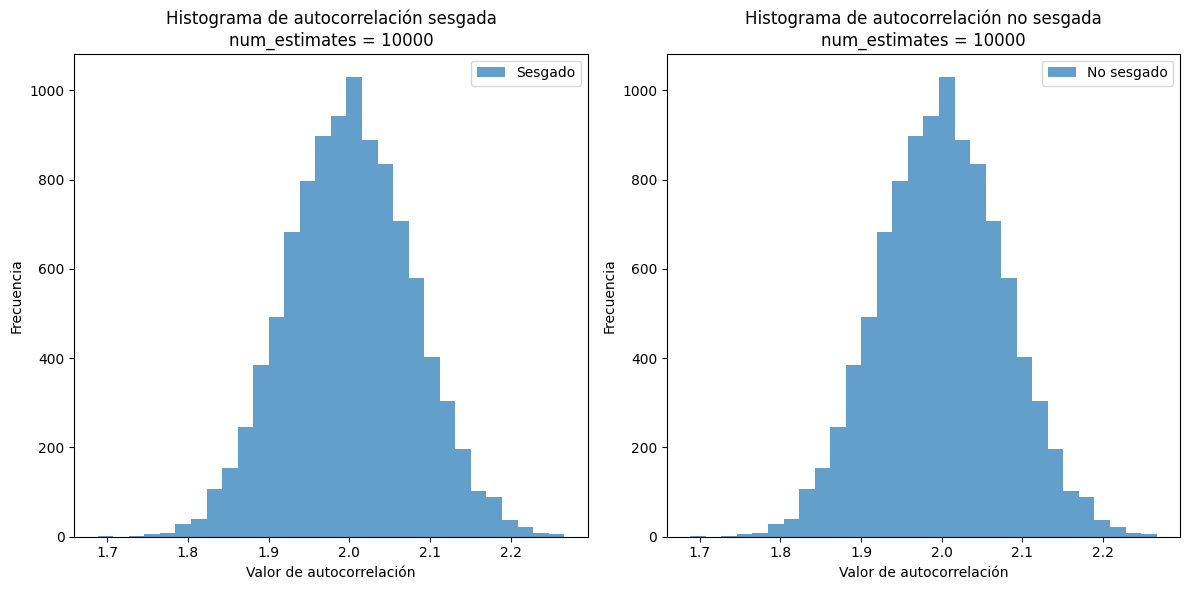

In [6]:
# EJERCICIO 6

num_estimates_list = [10, 100, 1000, 10000]
N = 1000 

for num_estimates in num_estimates_list: # Para cada valor de num_estimates
    sesgadas = []     # Lista para guardar las estimaciones sesgadas
    no_sesgadas = []  # Lista para guardar las estimaciones no sesgadas

    for _ in range(num_estimates): # Itera sobre una cantidad de la lista num_estimates
        x_sample = np.random.randn(N) + 1 # Genera una muestra de ruido con media 1
        
        r_sesg = np.correlate(x_sample, x_sample, mode='full') / N
        r_nosesg, _ = autocorr_unbiased(x_sample)  # _ descarta el segundo valor de retorno
        
        sesgadas.append(r_sesg[N-1])      # append añade un elemento al final de la lista
        no_sesgadas.append(r_nosesg[N-1])

    mean_sesgadas = np.mean(sesgadas)
    var_sesgadas = np.var(sesgadas)

    mean_nosesgadas = np.mean(no_sesgadas)
    var_nosesgadas = np.var(no_sesgadas)

    print(f"num_estimates = {num_estimates}")
    print(f"Media (sesgado)   = {mean_sesgadas:.4f}, Var (sesgado)   = {var_sesgadas:.4e}")
    print(f"Media (no sesgado)= {mean_nosesgadas:.4f}, Var (no sesgado)= {var_nosesgadas:.4e}")
    print("")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(sesgadas, bins=30, alpha=0.7, label='Sesgado')
    plt.title(f'Histograma de autocorrelación sesgada\nnum_estimates = {num_estimates}')
    plt.xlabel('Valor de autocorrelación')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(no_sesgadas, bins=30, alpha=0.7, label='No sesgado')
    plt.title(f'Histograma de autocorrelación no sesgada\nnum_estimates = {num_estimates}')
    plt.xlabel('Valor de autocorrelación')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()
    plt.show()


La autocorrelación en $k = 0$ es $\displaystyle R_x(0) = E[x(n)^2]$, 
que equivale a $\mathrm{Var}[x(n)] + \bigl(E[x(n)]\bigr)^2$. 
Si $x(n)$ tiene varianza 1 y media 1, 
entonces $R_x(0) = 2$.
___ 